In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

df_cr = pd.read_csv('data/SR-EELS-Profil_SM125_-33%/Cr_bicubic.csv')
df_cr = df_cr.iloc[::-1]
df_fe = pd.read_csv('data/SR-EELS-Profil_SM125_-33%/Fe_bicubic.csv')
df_fe = df_fe.iloc[::-1]

disp_lat = 0.1861361

xs = [x * disp_lat for x in range(len(df_cr))]
df_cr['X0'] = xs
df_fe['X0'] = xs

df_cr_IS = pd.read_csv('data/SR-EELS_vs_ImgSpec/ImgSpec_Cr.csv')
df_fe_IS = pd.read_csv('data/SR-EELS_vs_ImgSpec/ImgSpec_Fe.csv')

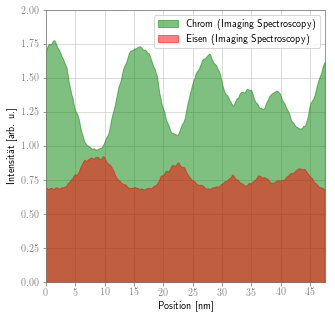

In [2]:
plt.figure(figsize=(5,5))
plt.fill_between(df_cr_IS.X, df_cr_IS.Y, color='g', alpha=0.5, label='Chrom (Imaging Spectroscopy)')
plt.fill_between(df_fe_IS.X, df_fe_IS.Y, color='r', alpha=0.5, label='Eisen (Imaging Spectroscopy)')
plt.xlim(0, df_fe_IS.X.max())
plt.xlabel('Position [nm]')
plt.xticks(range(0, 47, 5))
plt.ylim(0, 2)
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
plt.savefig('Bilder/ImgSpec_Vergleich_ImgSpec.pdf')
plt.show()

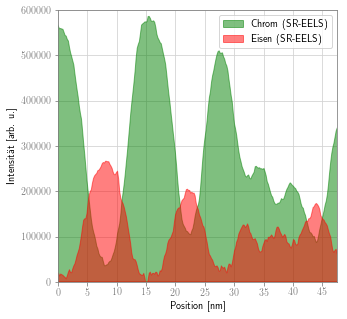

In [3]:
x_offset = 82

plt.figure(figsize=(5,5))
plt.fill_between(df_cr.X0 - x_offset, df_cr.Y0, color='g', alpha=0.5, label='Chrom (SR-EELS)')
plt.fill_between(df_fe.X0 - x_offset, df_fe.Y0, color='r', alpha=0.5, label='Eisen (SR-EELS)')
plt.xlim(0, df_fe_IS.X.max())
plt.xlabel('Position [nm]')
plt.xticks(range(0, 47, 5))
plt.ylim(0, 6e5)
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
plt.savefig('Bilder/ImgSpec_Vergleich_SR-EELS.pdf')
plt.show()

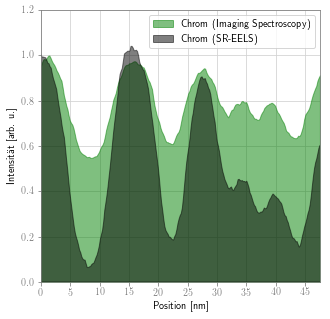

In [4]:
scale_sr_eels = df_cr[(df_cr.X0 >= x_offset) & (df_cr.X0 <= x_offset + 10)].Y0.max()
y_offset = 0

plt.figure(figsize=(5,5))
plt.fill_between(df_cr_IS.X,
                 (df_cr_IS.Y - y_offset) / (df_cr_IS.Y.max() - y_offset),
                 color='g', alpha=0.5,
                 label='Chrom (Imaging Spectroscopy)'
                )
plt.fill_between(df_cr.X0 - x_offset,
                 df_cr.Y0 / scale_sr_eels,
                 color='k', alpha=0.5,
                 label='Chrom (SR-EELS)'
                )
plt.xlim(0, df_fe_IS.X.max())
plt.xlabel('Position [nm]')
plt.xticks(range(0, 47, 5))
plt.ylim(0, 1.2)
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
plt.savefig('Bilder/ImgSpec_Vergleich_Chrom.pdf')
plt.show()

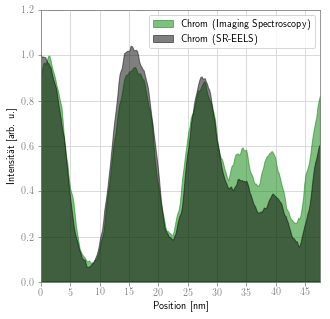

In [5]:
scale_sr_eels = df_cr[(df_cr.X0 >= x_offset) & (df_cr.X0 <= x_offset + 10)].Y0.max()
y_offset = 0.9

plt.figure(figsize=(5,5))
plt.fill_between(df_cr_IS.X,
                 (df_cr_IS.Y - y_offset) / (df_cr_IS.Y.max() - y_offset),
                 color='g', alpha=0.5,
                 label='Chrom (Imaging Spectroscopy)'
                )
plt.fill_between(df_cr.X0 - x_offset,
                 df_cr.Y0 / scale_sr_eels,
                 color='k', alpha=0.5,
                 label='Chrom (SR-EELS)'
                )
plt.xlim(0, df_fe_IS.X.max())
plt.xlabel('Position [nm]')
plt.xticks(range(0, 47, 5))
plt.ylim(0, 1.2)
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
plt.savefig('Bilder/ImgSpec_Vergleich_Chrom_scale.pdf')
plt.show()

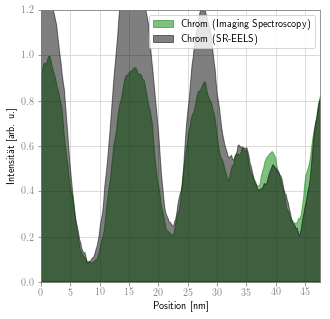

In [6]:
scale_sr_eels = df_cr[(df_cr.X0 >= x_offset) & (df_cr.X0 <= x_offset + 10)].Y0.max() * 0.75
y_offset = 0.9

plt.figure(figsize=(5,5))
plt.fill_between(df_cr_IS.X,
                 (df_cr_IS.Y - y_offset) / (df_cr_IS.Y.max() - y_offset),
                 color='g', alpha=0.5,
                 label='Chrom (Imaging Spectroscopy)'
                )
plt.fill_between(df_cr.X0 - x_offset,
                 df_cr.Y0 / scale_sr_eels,
                 color='k', alpha=0.5,
                 label='Chrom (SR-EELS)'
                )
plt.xlim(0, df_fe_IS.X.max())
plt.xlabel('Position [nm]')
plt.xticks(range(0, 47, 5))
plt.ylim(0, 1.2)
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
plt.show()

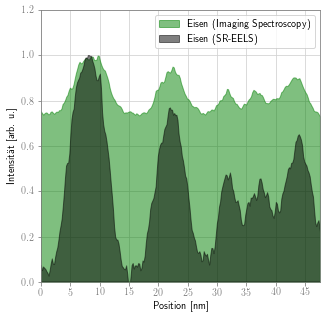

In [7]:
scale_sr_eels2 = df_fe[(df_fe.X0 >= x_offset) & (df_fe.X0 <= x_offset + 10)].Y0.max()
y_offset = 0

plt.figure(figsize=(5,5))
plt.fill_between(df_fe_IS.X,
                 (df_fe_IS.Y - y_offset) / (df_fe_IS.Y.max() - y_offset),
                 color='g', alpha=0.5,
                 label='Eisen (Imaging Spectroscopy)'
                )
plt.fill_between(df_fe.X0 - x_offset,
                 df_fe.Y0 / scale_sr_eels2,
                 color='k', alpha=0.5,
                 label='Eisen (SR-EELS)'
                )
plt.xlim(0, df_fe_IS.X.max())
plt.xlabel('Position [nm]')
plt.xticks(range(0, 47, 5))
plt.ylim(0, 1.2)
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
plt.savefig('Bilder/ImgSpec_Vergleich_Eisen.pdf')
plt.show()

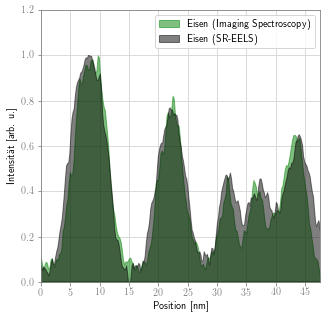

In [8]:
scale_sr_eels2 = df_fe[(df_fe.X0 >= x_offset) & (df_fe.X0 <= x_offset + 10)].Y0.max()
y_offset = 0.67

plt.figure(figsize=(5,5))
plt.fill_between(df_fe_IS.X,
                 (df_fe_IS.Y - y_offset) / (df_fe_IS.Y.max() - y_offset),
                 color='g', alpha=0.5,
                 label='Eisen (Imaging Spectroscopy)'
                )
plt.fill_between(df_fe.X0 - x_offset,
                 df_fe.Y0 / scale_sr_eels2,
                 color='k', alpha=0.5,
                 label='Eisen (SR-EELS)'
                )
plt.xlim(0, df_fe_IS.X.max())
plt.xlabel('Position [nm]')
plt.xticks(range(0, 47, 5))
plt.ylim(0, 1.2)
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
plt.savefig('Bilder/ImgSpec_Vergleich_Eisen_scale.pdf')
plt.show()

In [9]:
df_cr.head()

,Y0,X0
1199,-1205.5859,0.000000
1198,565.0219,0.186136
1197,-1443.8832,0.372272
1196,-3028.4629,0.558408
1195,-2726.2703,0.744544
